In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
# https://www.transtats.bts.gov/Data_Elements.aspx?Data=2
# US flight data for domestic and international
# *Most recent three months of international data by airport and by carrier withheld because of confidentiality agreements for individual routes. 
# Summary totals are shown for all airports and all carriers. 

flight_data_df = pd.read_csv('RawData/Flights_3_12_2020.csv')

In [3]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
3,2002,TOTAL,"8,085,083","1,023,994","9,109,077"
4,2003,1,"785,651","98,053","883,704"
...,...,...,...,...,...
224,2019,TOTAL,"8,591,641","1,620,275","10,211,916"
225,NaN,NaN,NaN,NaN,NaN
226,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop the last few rows which have null values
flight_data_df = flight_data_df.dropna(how='any')

In [5]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
3,2002,TOTAL,"8,085,083","1,023,994","9,109,077"
4,2003,1,"785,651","98,053","883,704"
...,...,...,...,...,...
220,2019,9,"703,929","123,258","827,187"
221,2019,10,"740,139","126,268","866,407"
222,2019,11,"694,283","119,996","814,279"
223,2019,12,"720,447","131,795","852,242"


In [6]:
# Drop the rows which have totals for each year
flight_data_df = flight_data_df[flight_data_df['Month'] != 'TOTAL']

In [7]:
flight_data_df 

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
4,2003,1,"785,651","98,053","883,704"
5,2003,2,"690,750","85,965","776,715"
...,...,...,...,...,...
219,2019,8,"769,346","147,077","916,423"
220,2019,9,"703,929","123,258","827,187"
221,2019,10,"740,139","126,268","866,407"
222,2019,11,"694,283","119,996","814,279"


In [8]:
flight_data_df.dtypes

Year             object
Month            object
DOMESTIC         object
INTERNATIONAL    object
TOTAL            object
dtype: object

In [9]:
columns = flight_data_df.columns
for column in columns:
    flight_data_df[column] = flight_data_df[column].str.replace(",","").astype(float)

/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
flight_data_df.dtypes

Year             float64
Month            float64
DOMESTIC         float64
INTERNATIONAL    float64
TOTAL            float64
dtype: object

In [11]:
flight_data_df['Year'] = flight_data_df['Year'].astype(int)
flight_data_df['Month'] = flight_data_df['Month'].astype(int)

/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
flight_data_df.dtypes

Year               int64
Month              int64
DOMESTIC         float64
INTERNATIONAL    float64
TOTAL            float64
dtype: object

In [13]:
Date = []
for y, m in zip(flight_data_df.Year, flight_data_df.Month):
    Date.append(date(y, m, 1))

flight_data_df['Date'] = Date

/Users/beastmode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date
0,2002,10,815489.0,92565.0,908054.0,2002-10-01
1,2002,11,766775.0,91342.0,858117.0,2002-11-01
2,2002,12,782175.0,96881.0,879056.0,2002-12-01
4,2003,1,785651.0,98053.0,883704.0,2003-01-01
5,2003,2,690750.0,85965.0,776715.0,2003-02-01
...,...,...,...,...,...,...
219,2019,8,769346.0,147077.0,916423.0,2019-08-01
220,2019,9,703929.0,123258.0,827187.0,2019-09-01
221,2019,10,740139.0,126268.0,866407.0,2019-10-01
222,2019,11,694283.0,119996.0,814279.0,2019-11-01


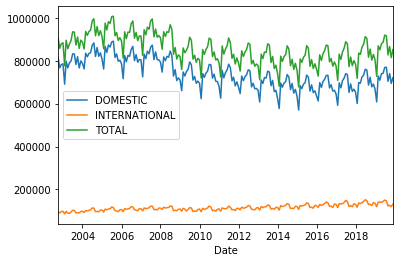

In [15]:
ax = plt.gca()
flight_data_df.plot.line(x = 'Date', y='DOMESTIC',ax=ax)
flight_data_df.plot.line(x = 'Date', y='INTERNATIONAL',ax=ax)
flight_data_df.plot.line(x = 'Date', y='TOTAL',ax=ax)
plt.show()

In [17]:
#https://data.humdata.org/dataset/ebola-cases-2014

ebola_df = pd.read_csv('RawData/ebola_data_db_format.csv')
ebola_df.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [18]:
ebola_df['Indicator'].value_counts()

Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed, probable and suspected Ebola cases in the last 21 days                     190
Number of confirmed Ebola cases in the last 21 days                                             190


In [19]:
ebola_df = ebola_df[(ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola cases')|
        (ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola deaths')]

In [20]:
ebola_df['Indicator'].value_counts()

Cumulative number of confirmed, probable and suspected Ebola deaths    2485
Cumulative number of confirmed, probable and suspected Ebola cases     2477
Name: Indicator, dtype: int64

In [21]:
ebola_df

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0
7,"Cumulative number of confirmed, probable and s...",Liberia,2015-03-10,9343.0
11,"Cumulative number of confirmed, probable and s...",Liberia,2015-03-10,4162.0
12,"Cumulative number of confirmed, probable and s...",Sierra Leone,2015-03-10,11619.0
...,...,...,...,...
17568,"Cumulative number of confirmed, probable and s...",United States of America,2016-03-23,4.0
17572,"Cumulative number of confirmed, probable and s...",Nigeria,2016-03-23,8.0
17576,"Cumulative number of confirmed, probable and s...",Senegal,2016-03-23,0.0
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0


In [22]:
ebola_df = ebola_df.pivot_table(values='value', index=['Country', 'Date'], columns=['Indicator'])

In [23]:
ebola_df

Indicator                            Cumulative number of confirmed, probable and suspected Ebola cases  \
Country                  Date                                                                             
Guinea                   2014-08-29                                              648.0                    
                         2014-09-05                                              812.0                    
                         2014-09-08                                              862.0                    
                         2014-09-12                                              861.0                    
                         2014-09-16                                              936.0                    
...                                                                                ...                    
United States of America 2015-12-17                                                4.0                    
                         2015-12-22                                                4.0                    
                         2015-12-23                                                4.0                    
                         2015-12-29                                                4.0                    
                         2016-03-23                                                4.0                    

Indicator                            Cumulative number of confirmed, probable and suspected Ebola deaths  
Country                  Date                                                                             
Guinea                   2014-08-29                                              430.0                    
                         2014-09-05                                              517.0                    
                         2014-09-08                                              555.0                    
                         2014-09-12                                              557.0                    
                         2014-09-16                                              595.0                    
...                                                                                ...                    
United States of America 2015-12-17                                                1.0                    
                         2015-12-22                                                1.0                    
                         2015-12-23                                                1.0                    
                         2015-12-29                                                1.0                    
                         2016-03-23                                                1.0                    

[2485 rows x 2 columns]

In [24]:
ebola_df= ebola_df.reset_index()

In [25]:
ebola_df['Country'].value_counts()

Guinea                      259
Sierra Leone                259
Liberia                     259
Nigeria                     255
Senegal                     254
United States of America    245
Spain                       243
Mali                        243
United Kingdom              221
Italy                       141
Liberia 2                   105
Guinea 2                      1
Name: Country, dtype: int64

In [26]:
ebola_df['Country'] = ebola_df['Country'].replace({'Liberia 2': 'Liberia', 'Guinea 2': 'Liberia'})

In [27]:
ebola_df['Country'].value_counts()

Liberia                     365
Guinea                      259
Sierra Leone                259
Nigeria                     255
Senegal                     254
United States of America    245
Spain                       243
Mali                        243
United Kingdom              221
Italy                       141
Name: Country, dtype: int64

In [28]:
ebola_df = ebola_df.rename(columns=
                    {'Cumulative number of confirmed, probable and suspected Ebola deaths': 'Cumulative Number of Ebola Deaths',
                    'Cumulative number of confirmed, probable and suspected Ebola cases': 'Cumulative Number of Ebola Cases'})

In [29]:
ebola_df = ebola_df.sort_values(by=['Date', 'Country'])

In [30]:
ebola_df

Indicator,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,Guinea,2014-08-29,648.0,430.0
401,Liberia,2014-08-29,1378.0,694.0
1008,Nigeria,2014-08-29,19.0,7.0
1517,Sierra Leone,2014-08-29,1026.0,422.0
1,Guinea,2014-09-05,812.0,517.0
...,...,...,...,...
1516,Senegal,2016-03-23,1.0,0.0
1775,Sierra Leone,2016-03-23,14122.0,3955.0
2018,Spain,2016-03-23,1.0,0.0
2239,United Kingdom,2016-03-23,1.0,0.0


In [31]:
us_ebola_df = ebola_df.loc[ebola_df['Country'] == 'United States of America',:]

In [32]:
us_ebola_df

Indicator,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
2240,United States of America,2014-10-03,1.0,0.0
2241,United States of America,2014-10-08,1.0,0.0
2242,United States of America,2014-10-10,1.0,0.0
2243,United States of America,2014-10-15,2.0,1.0
2244,United States of America,2014-10-17,3.0,1.0
...,...,...,...,...
2480,United States of America,2015-12-17,4.0,1.0
2481,United States of America,2015-12-22,4.0,1.0
2482,United States of America,2015-12-23,4.0,1.0
2483,United States of America,2015-12-29,4.0,1.0


In [33]:
# Get the last date for each county
last_ebola_data = ebola_df[ebola_df['Date'] == max(ebola_df['Date'])].reset_index()

In [34]:
last_ebola_data

Indicator,index,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,258,Guinea,2016-03-23,3804.0,2536.0
1,400,Italy,2016-03-23,1.0,0.0
2,259,Liberia,2016-03-23,5.0,4.0
3,659,Liberia,2016-03-23,10666.0,4806.0
4,764,Liberia,2016-03-23,9.0,3.0
5,1007,Mali,2016-03-23,8.0,6.0
6,1262,Nigeria,2016-03-23,20.0,8.0
7,1516,Senegal,2016-03-23,1.0,0.0
8,1775,Sierra Leone,2016-03-23,14122.0,3955.0
9,2018,Spain,2016-03-23,1.0,0.0


In [36]:
final_ebola_cases = last_ebola_data['Cumulative Number of Ebola Cases'].sum()
final_ebola_deaths = last_ebola_data['Cumulative Number of Ebola Deaths'].sum()

In [37]:
final_ebola_cases

28642.0

In [38]:
final_ebola_deaths

11319.0

In [39]:
dates = ebola_df['Date'].unique().tolist()
grouped_date_ebola = ebola_df.groupby('Date')

In [41]:
total_cases = grouped_date_ebola['Cumulative Number of Ebola Cases'].sum().tolist()
total_deathes = grouped_date_ebola['Cumulative Number of Ebola Deaths'].sum().tolist()

In [42]:
dates.sort()

In [43]:
grouped_date_ebola =  pd.DataFrame({'Date': dates,
                                   'Number of Ebola Cases': total_cases,
                                   'Number of Ebola Deaths': total_deathes})

In [44]:
grouped_date_ebola

,Date,Number of Ebola Cases,Number of Ebola Deaths
0,2014-08-29,3071.0,1553.0
1,2014-09-05,3967.0,2105.0
2,2014-09-08,4293.0,2296.0
3,2014-09-12,4390.0,2226.0
4,2014-09-16,4985.0,2461.0
...,...,...,...
254,2015-12-17,28638.0,11315.0
255,2015-12-22,28637.0,11315.0
256,2015-12-23,28637.0,11315.0
257,2015-12-29,28637.0,11315.0


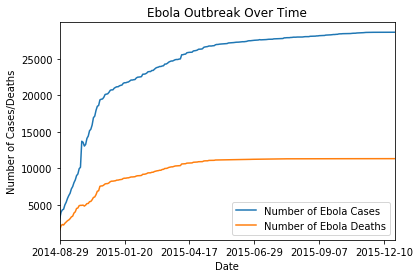

In [51]:
import matplotlib.dates as mdates

ax = plt.gca()
grouped_date_ebola.plot.line(x = 'Date', y='Number of Ebola Cases',ax=ax)
grouped_date_ebola.plot.line(x = 'Date', y='Number of Ebola Deaths',ax=ax)
plt.title('Ebola Outbreak Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases/Deaths')
# #set ticks every week
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# #set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

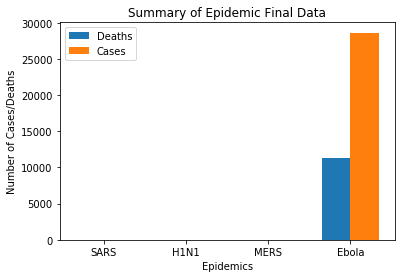

In [57]:
import numpy as np


cases = (20, 35, 30, final_ebola_cases)
deaths = (25, 32, 34, final_ebola_deaths)

x = np.arange(4) 
width = 0.35       
plt.bar(x, deaths, width, label='Deaths')
plt.bar(x + width, cases, width, label='Cases')

plt.xlabel('Epidemics')
plt.ylabel('Number of Cases/Deaths')
plt.title('Summary of Epidemic Final Data')

plt.xticks(x + width / 2, ('SARS', 'H1N1', 'MERS', 'Ebola'))
plt.legend(loc='best')
plt.show()
